In [1]:
import numpy as np
images = np.load('MNIST/mnist_images.npy')
labels = np.load('MNIST/mnist_labels.npy')

train_images = images[:1000,:]
train_labels = labels[:1000]
test_images = images[1000:2000,:]
test_labels = labels[1000:2000]

num_classes = 10

In [2]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

Using TensorFlow backend.


In [3]:
# convert class vectors to binary class matrices
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)
print train_labels.shape

(1000, 10)


In [6]:
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [7]:
# Fit the model
print train_labels.shape
model.fit(train_images, train_labels, 
          validation_data = (test_images, test_labels), 
          nb_epoch=50, 
          batch_size = 100)

(1000, 10)
Train on 1000 samples, validate on 1000 samples
Epoch 1/50
1000/1000 [==============================] - 0s - loss: 13.7822 - acc: 0.1400 - val_loss: 12.9263 - val_acc: 0.1960
Epoch 2/50
1000/1000 [==============================] - 0s - loss: 13.1235 - acc: 0.1830 - val_loss: 13.1901 - val_acc: 0.1800
Epoch 3/50
1000/1000 [==============================] - 0s - loss: 13.2110 - acc: 0.1770 - val_loss: 12.2089 - val_acc: 0.2360
Epoch 4/50
1000/1000 [==============================] - 0s - loss: 12.4187 - acc: 0.2210 - val_loss: 11.7489 - val_acc: 0.2620
Epoch 5/50
1000/1000 [==============================] - 0s - loss: 12.3419 - acc: 0.2250 - val_loss: 11.7608 - val_acc: 0.2650
Epoch 6/50
1000/1000 [==============================] - 0s - loss: 11.7420 - acc: 0.2650 - val_loss: 11.3687 - val_acc: 0.2870
Epoch 7/50
1000/1000 [==============================] - 0s - loss: 11.6034 - acc: 0.2760 - val_loss: 11.4636 - val_acc: 0.2860
Epoch 8/50
1000/1000 [==============================

In [8]:
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K

In [9]:
batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

train_images = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
test_images = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [10]:
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')

('train_images shape:', (1000, 28, 28, 1))
(1000, 'train samples')
(1000, 'test samples')


In [11]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [12]:
model.compile(optimizer='rmsprop',
          loss='categorical_crossentropy',
          metrics=['accuracy'])

In [13]:
hist = model.fit(train_images, train_labels,
          batch_size=batch_size,
          nb_epoch=25,
          verbose=1,
          validation_data=(test_images, test_labels))

Train on 1000 samples, validate on 1000 samples
Epoch 1/25
1000/1000 [==============================] - 2s - loss: 13.7689 - acc: 0.1290 - val_loss: 13.7596 - val_acc: 0.1420
Epoch 2/25
1000/1000 [==============================] - 2s - loss: 12.2713 - acc: 0.2320 - val_loss: 11.8043 - val_acc: 0.2590
Epoch 3/25
1000/1000 [==============================] - 2s - loss: 11.3104 - acc: 0.2900 - val_loss: 9.6131 - val_acc: 0.3930
Epoch 4/25
1000/1000 [==============================] - 2s - loss: 10.2654 - acc: 0.3510 - val_loss: 8.5820 - val_acc: 0.4600
Epoch 5/25
1000/1000 [==============================] - 2s - loss: 9.3263 - acc: 0.4090 - val_loss: 8.0888 - val_acc: 0.4870
Epoch 6/25
1000/1000 [==============================] - 2s - loss: 8.3647 - acc: 0.4560 - val_loss: 6.9464 - val_acc: 0.5600
Epoch 7/25
1000/1000 [==============================] - 2s - loss: 7.3228 - acc: 0.5240 - val_loss: 5.5046 - val_acc: 0.6450
Epoch 8/25
1000/1000 [==============================] - 2s - loss: 6.18

In [14]:
score = model.evaluate(test_images, test_labels, verbose=0)

In [15]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

('Test loss:', 0.34673628067970275)
('Test accuracy:', 0.93400000000000005)


In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

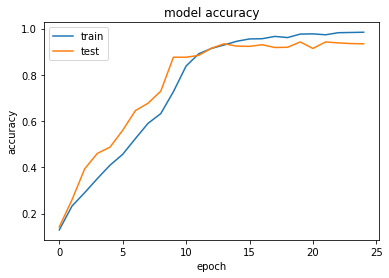

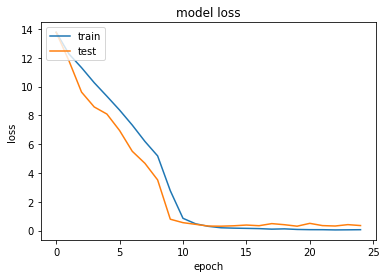

In [18]:
# summarize history for accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()